In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
spray = pd.read_csv("data/spray.csv")

# checking duplicates for mosquitoes (in train)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# check total mosquitoes in sample
train["NumMosquitos"].sum()

135039

In [4]:
# duplicated rows with less than 50 mosquitoes
duplicates = train[(train.duplicated())]

duplicates["NumMosquitos"].sum()

36068

In [5]:
# aggregate all rows with duplicates

train["totalmozzies"] = duplicates.groupby(
    [
        "Date",
        "Address",
        "Species",
        "Block",
        "Street",
        "Trap",
        "AddressNumberAndStreet",
        "AddressAccuracy",
        "WnvPresent",
    ]
)["NumMosquitos"].transform("sum")

train["totalmozzies"].fillna(train["NumMosquitos"], inplace=True)

In [6]:
train.sort_values(by=["totalmozzies"], ascending=True, inplace=True)

In [7]:
train.shape

(10506, 13)

In [8]:
train.drop_duplicates(
    subset=[
        "Date",
        "Address",
        "Species",
        "Block",
        "Street",
        "Trap",
        "AddressNumberAndStreet",
        "AddressAccuracy",
        "NumMosquitos",
        "WnvPresent",
        "totalmozzies",
    ],
    inplace=True,
    keep="last",
)

In [9]:
train["totalmozzies"].sum()

134881.0

In [10]:
train.shape

(9799, 13)

# write data cleaning function (for test and train)

In [11]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [12]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
totalmozzies              0
dtype: int64

In [13]:
def cleaner(df):
    # change title to lower case
    df.columns = df.columns.str.lower()

    # drop unnecessary columns
    try:
        df.drop(
            columns=[
                "addressaccuracy",
                "addressnumberandstreet",
                "address",
                "block",
                "street",
            ],
            inplace=True,
        )
    except KeyError:
        pass

    # convert date time
    df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

    # create year, month/week in dataset
    df["year"] = (df["date"].dt.strftime("%Y")).astype(int)
    df["weekofyear"] = df.date.dt.isocalendar().week

    # total mozzies as integer
    try:
        df["totalmozzies"] = df["totalmozzies"].astype("int64")
    except KeyError:
        pass

    # display final datatypes
    display(df.dtypes)


# keep in mind final submission is ID, prediction

In [14]:
cleaner(train)

date            datetime64[ns]
species                 object
trap                    object
latitude               float64
longitude              float64
nummosquitos             int64
wnvpresent               int64
totalmozzies             int64
year                     int32
weekofyear              UInt32
dtype: object

In [15]:
train

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,totalmozzies,year,weekofyear
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,1,2007,22
4703,2009-07-13,CULEX PIPIENS,T102,41.750498,-87.605294,1,0,1,2009,29
4730,2009-07-17,CULEX PIPIENS,T046,41.891118,-87.654491,1,0,1,2009,29
4731,2009-07-17,CULEX SALINARIUS,T046,41.891118,-87.654491,1,0,1,2009,29
4734,2009-07-17,CULEX PIPIENS/RESTUANS,T049,41.896282,-87.655232,1,0,1,2009,29
...,...,...,...,...,...,...,...,...,...,...
1227,2007-08-01,CULEX PIPIENS,T115,41.673408,-87.599862,50,0,1450,2007,31
1713,2007-08-08,CULEX PIPIENS,T138,41.726465,-87.585413,50,0,1500,2007,32
2067,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,50,0,2000,2007,33
2748,2007-08-28,CULEX PIPIENS,T115,41.673408,-87.599862,50,0,2000,2007,35


In [16]:
cleaner(test)

id                     int64
date          datetime64[ns]
species               object
trap                  object
latitude             float64
longitude            float64
year                   int32
weekofyear            UInt32
dtype: object

In [17]:
display(train.head())
display(test.head())

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,totalmozzies,year,weekofyear
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,1,2007,22
4703,2009-07-13,CULEX PIPIENS,T102,41.750498,-87.605294,1,0,1,2009,29
4730,2009-07-17,CULEX PIPIENS,T046,41.891118,-87.654491,1,0,1,2009,29
4731,2009-07-17,CULEX SALINARIUS,T046,41.891118,-87.654491,1,0,1,2009,29
4734,2009-07-17,CULEX PIPIENS/RESTUANS,T049,41.896282,-87.655232,1,0,1,2009,29


,id,date,species,trap,latitude,longitude,year,weekofyear
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,24
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,24
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,24
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,24
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,2008,24


# EDA - train

Only 3 species from the train data set seem to be carriers of the WNV: 
* Culex Pipens/Restuans
* Culex Restuans
* Culex Pipiens

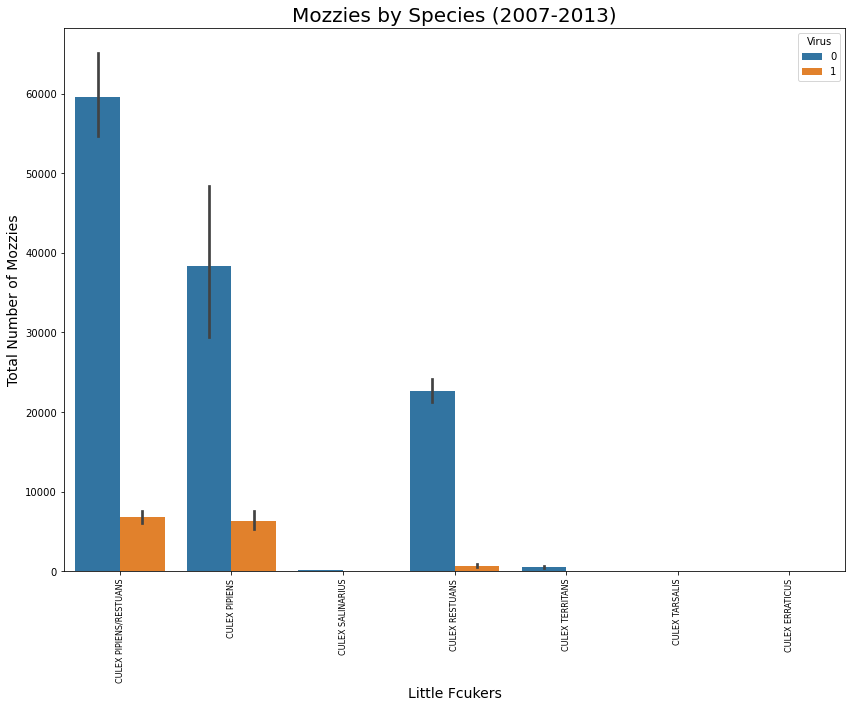

In [18]:
# show total mozzies by species

plt.figure(figsize=(14, 10))
plot = sns.barplot(
    x="species", y="totalmozzies", hue="wnvpresent", data=train, estimator=sum
)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Total Number of Mozzies", fontsize=14)
plt.xlabel("Little Fcukers", fontsize=14)
plt.legend(loc="upper right", title="Virus")
plt.title("Mozzies by Species (2007-2013)", fontsize=20)
plt.show()

Over the years, number of culex pipiens seem to have decreased, but increased again in 2013. 

Culex pipiens/restuans (no idea what these are) seem to have decreased then increased again. IF this is a combination of the 2 species of mosquitoes, then the pattern we are seeing seems to be congruent with our observations for culex pipiens and culex restuans.

There seems to be no effect of spraying on culex restuans, in fact the population has steadily increased over the years. Possible things to explore: 
1) Did they develop a resistance to the sprays? 

2) Were the areas where culex restuans found even sprayed at all? 

3) Which areas were these found in? Did they have a different climate compared to the other species of mosquitoes? 

Text(0, 0.5, 'Total Number of Mozzies')

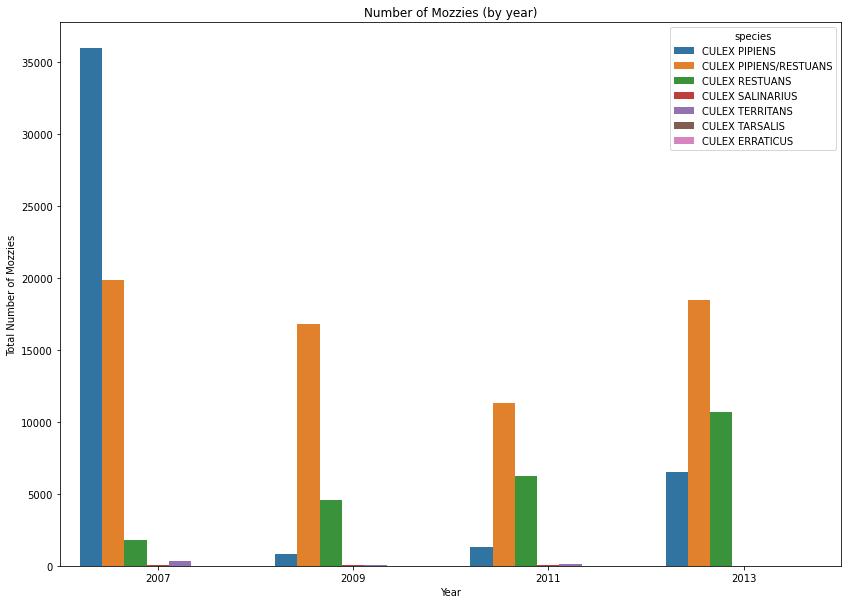

In [19]:
# species by years

moz_year = train.groupby(["year", "species"], as_index=False).sum()

plt.figure(figsize=(14, 10))
plt.title("Number of Mozzies (by year)")
sns.barplot(x="year", y="totalmozzies", hue="species", data=moz_year)
plt.xlabel("Year")
plt.ylabel("Total Number of Mozzies")

In [20]:
# baseline accuracy

train['wnvpresent'].value_counts(normalize=True)

0    0.947852
1    0.052148
Name: wnvpresent, dtype: float64

<AxesSubplot:xlabel='totalmozzies', ylabel='wnvpresent'>

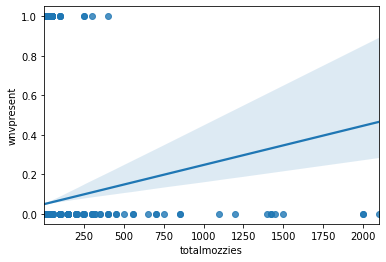

In [21]:
# correlation between total number of mosquitoes vs wnv 

# this is not a good representation? 1) binary 2) imbalanced class 

sns.regplot(x=train['totalmozzies'], y=train['wnvpresent'])


In [22]:
# mozzies by area? 

In [23]:
# to decide if we should get_dummies for species that contribute to WNV

# join train with weather dataset based on date (and close-ness to the weather station?)

# clean spray + eda

In [24]:
spray.shape

(14835, 4)

In [25]:
spray.dropna(inplace=True) 

# also drop time column as this is not present in any other dataset 
spray.drop(columns='Time', inplace=True)

In [26]:
spray.shape

(14251, 3)

In [27]:
cleaner(spray)

date          datetime64[ns]
latitude             float64
longitude            float64
year                   int32
weekofyear            UInt32
dtype: object

In [28]:
spray[spray.duplicated()] # to drop these 541 rows

,date,latitude,longitude,year,weekofyear
485,2011-09-07,41.983917,-87.793088,2011,36
490,2011-09-07,41.986460,-87.794225,2011,36
491,2011-09-07,41.986460,-87.794225,2011,36
492,2011-09-07,41.986460,-87.794225,2011,36
493,2011-09-07,41.986460,-87.794225,2011,36
...,...,...,...,...,...
1025,2011-09-07,41.986460,-87.794225,2011,36
1026,2011-09-07,41.986460,-87.794225,2011,36
1027,2011-09-07,41.986460,-87.794225,2011,36
1028,2011-09-07,41.986460,-87.794225,2011,36


In [29]:
spray.drop_duplicates(inplace=True)
spray.shape

(13710, 5)

In [30]:
# maybe can plot when each place was sprayed? frequency?

In [31]:
# when were sprays implemented

# Split the dataframe based on year
spray_df_2013 = spray[spray['date'].dt.year == 2013]
spray_df_2011 = spray[spray['date'].dt.year == 2011]

spray_2011 = spray_df_2011['date'].unique()[:2]
spray_2011

spray_2013 = spray_df_2013['date'].unique()[:8]
spray_2013

array(['2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

# Spray vs Mozzies vs WNV

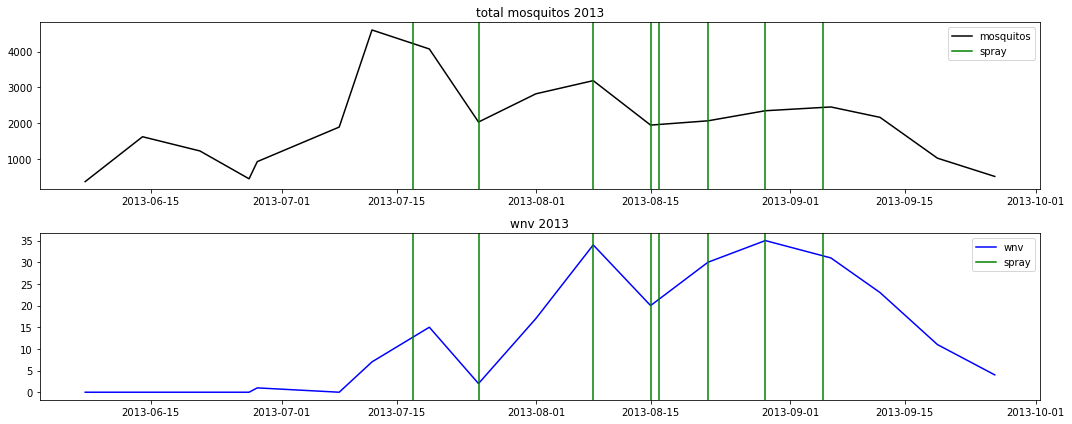

In [32]:
moz_2013 = train[train['date'].dt.year==2013].groupby('date')['totalmozzies'].sum()
wnv_2013 = train[train['date'].dt.year==2013].groupby('date')['wnvpresent'].sum()


fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(moz_2013.index, moz_2013.values, color='black')
for date in spray_2013:
    ax[0].axvline(x=date, color='green', ls='-')
ax[0].set_title('total mosquitos 2013')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnv_2013.index, wnv_2013.values, color='blue')
for date in spray_2013:
    ax[1].axvline(x=date, color='green', ls='-')
ax[1].set_title('wnv 2013')
ax[1].legend(['wnv','spray'], loc='upper right')


plt.tight_layout()

For 2013, mosquitoes were sprayed mosquitoes extensively. It seemed to work in the beginning, but mid-August, despite spraying the mosquito population (that had WNV) went up although total number of mosquitoes kind of remained constant. Could it be due to weather factors? 

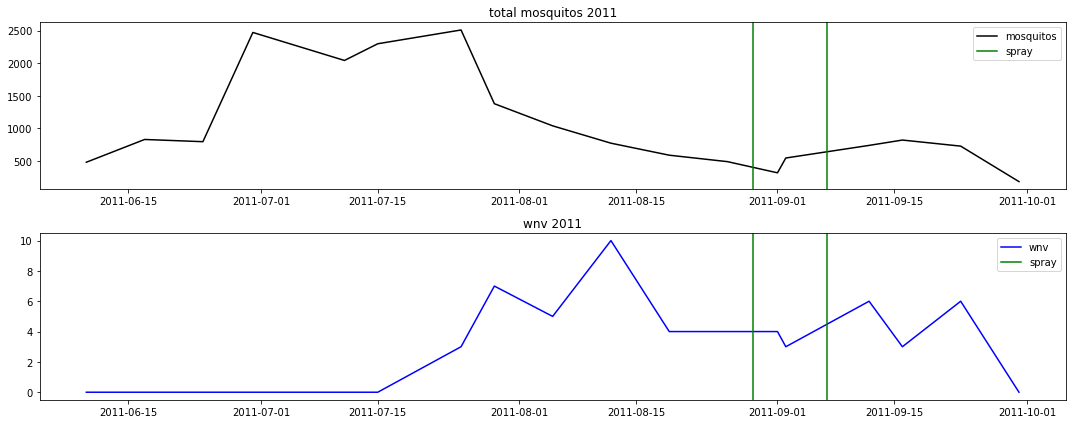

In [33]:
moz_2011 = train[train['date'].dt.year==2011].groupby('date')['totalmozzies'].sum()
wnv_2011 = train[train['date'].dt.year==2011].groupby('date')['wnvpresent'].sum()


fig, ax = plt.subplots(nrows=2, figsize=(15,6))
ax[0].plot(moz_2011.index, moz_2011.values, color='black')
for date in spray_2011:
    ax[0].axvline(x=date, color='green', ls='-')
ax[0].set_title('total mosquitos 2011')
ax[0].legend(['mosquitos','spray'], loc='upper right')


ax[1].plot(wnv_2011.index, wnv_2011.values, color='blue')
for date in spray_2011:
    ax[1].axvline(x=date, color='green', ls='-')
ax[1].set_title('wnv 2011')
ax[1].legend(['wnv','spray'], loc='upper right')


plt.tight_layout()

Only sprayed mosquitoes twice. It did not seem to work? For the first spray, total mosquito population decreased, but WNV was constant. After the 2nd spray, both mosquito population and WNV mosquitoes went up, suggesting that 1) the sprays are not effective, or 2) there could be other factors that increased mosquito breeding / propagation of WNV. 

# Join train+test with weather_clean (from Harry)

In [34]:
weather = pd.read_csv('data/weather_cleaned.csv')

In [35]:
weather.drop(columns='Unnamed: 0', inplace=True)

In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1472 non-null   object 
 1   Tmax         1472 non-null   float64
 2   Tmin         1472 non-null   float64
 3   Tavg         1472 non-null   float64
 4   Depart       1472 non-null   float64
 5   DewPoint     1472 non-null   float64
 6   Heat         1472 non-null   float64
 7   Cool         1472 non-null   float64
 8   Sunrise      1472 non-null   float64
 9   Sunset       1472 non-null   float64
 10  SnowFall     1472 non-null   float64
 11  PrecipTotal  1472 non-null   float64
 12  StnPressure  1472 non-null   float64
 13  SeaLevel     1472 non-null   float64
 14  ResultSpeed  1472 non-null   float64
 15  ResultDir    1472 non-null   float64
 16  AvgSpeed     1472 non-null   float64
 17  Humidity     1472 non-null   float64
 18  Daylength    1472 non-null   float64
 19  CodeSu

In [37]:
# clean weather columns & datatypes
cleaner(weather)

date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                  float64
depart                float64
dewpoint              float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir             float64
avgspeed              float64
humidity              float64
daylength             float64
codesum                object
year                    int32
weekofyear             UInt32
dtype: object

In [38]:
# 717 null values in CodeSum (how to impute?)
# weather.isnull().sum() 

In [39]:
# merge train dataset with weather
final_train = pd.merge(train, weather, on='date')
final_train.head()

final_train.drop(columns=['year_y', 'weekofyear_y'], inplace=True)
final_train.rename(columns={"year_x": "year", "weekofyear_x": "weekofyear"}, inplace=True)

final_train.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,totalmozzies,year,weekofyear,tmax,tmin,tavg,depart,dewpoint,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,humidity,daylength,codesum
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,1,2007,22,31.111111,16.944444,24.166667,10.0,14.722222,0.0,10.5,420.5,1917.0,0.0,0.0,29.415,30.1,5.8,17.0,6.95,55.5,896.5,HZ BR
1,2007-05-29,CULEX PIPIENS/RESTUANS,T148,42.017430,-87.687769,1,0,1,2007,22,31.111111,16.944444,24.166667,10.0,14.722222,0.0,10.5,420.5,1917.0,0.0,0.0,29.415,30.1,5.8,17.0,6.95,55.5,896.5,HZ BR
2,2007-05-29,CULEX RESTUANS,T153,41.907645,-87.760886,1,0,1,2007,22,31.111111,16.944444,24.166667,10.0,14.722222,0.0,10.5,420.5,1917.0,0.0,0.0,29.415,30.1,5.8,17.0,6.95,55.5,896.5,HZ BR
3,2007-05-29,CULEX RESTUANS,T159,41.732984,-87.649642,1,0,1,2007,22,31.111111,16.944444,24.166667,10.0,14.722222,0.0,10.5,420.5,1917.0,0.0,0.0,29.415,30.1,5.8,17.0,6.95,55.5,896.5,HZ BR
4,2007-05-29,CULEX PIPIENS/RESTUANS,T143,41.999129,-87.795585,1,0,1,2007,22,31.111111,16.944444,24.166667,10.0,14.722222,0.0,10.5,420.5,1917.0,0.0,0.0,29.415,30.1,5.8,17.0,6.95,55.5,896.5,HZ BR


In [40]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9798
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          9799 non-null   datetime64[ns]
 1   species       9799 non-null   object        
 2   trap          9799 non-null   object        
 3   latitude      9799 non-null   float64       
 4   longitude     9799 non-null   float64       
 5   nummosquitos  9799 non-null   int64         
 6   wnvpresent    9799 non-null   int64         
 7   totalmozzies  9799 non-null   int64         
 8   year          9799 non-null   int32         
 9   weekofyear    9799 non-null   UInt32        
 10  tmax          9799 non-null   float64       
 11  tmin          9799 non-null   float64       
 12  tavg          9799 non-null   float64       
 13  depart        9799 non-null   float64       
 14  dewpoint      9799 non-null   float64       
 15  heat          9799 non-null   float64 

In [41]:
# merge test dataset with weather
final_test = pd.merge(test, weather, on='date')
final_test.head()

final_test.drop(columns=['year_y', 'weekofyear_y'], inplace=True)
final_test.rename(columns={"year_x": "year", "weekofyear_x": "weekofyear"}, inplace=True)

final_test.head()

,id,date,species,trap,latitude,longitude,year,weekofyear,tmax,tmin,tavg,depart,dewpoint,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,humidity,daylength,codesum
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,24,30.0,17.5,23.888889,7.0,13.055556,0.0,10.0,416.0,1926.0,0.0,0.0,29.31,29.98,9.15,18.0,10.2,50.5,910.0,NaN
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,2008,24,30.0,17.5,23.888889,7.0,13.055556,0.0,10.0,416.0,1926.0,0.0,0.0,29.31,29.98,9.15,18.0,10.2,50.5,910.0,NaN
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,2008,24,30.0,17.5,23.888889,7.0,13.055556,0.0,10.0,416.0,1926.0,0.0,0.0,29.31,29.98,9.15,18.0,10.2,50.5,910.0,NaN
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,2008,24,30.0,17.5,23.888889,7.0,13.055556,0.0,10.0,416.0,1926.0,0.0,0.0,29.31,29.98,9.15,18.0,10.2,50.5,910.0,NaN
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,2008,24,30.0,17.5,23.888889,7.0,13.055556,0.0,10.0,416.0,1926.0,0.0,0.0,29.31,29.98,9.15,18.0,10.2,50.5,910.0,NaN


In [42]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           116293 non-null  int64         
 1   date         116293 non-null  datetime64[ns]
 2   species      116293 non-null  object        
 3   trap         116293 non-null  object        
 4   latitude     116293 non-null  float64       
 5   longitude    116293 non-null  float64       
 6   year         116293 non-null  int32         
 7   weekofyear   116293 non-null  UInt32        
 8   tmax         116293 non-null  float64       
 9   tmin         116293 non-null  float64       
 10  tavg         116293 non-null  float64       
 11  depart       116293 non-null  float64       
 12  dewpoint     116293 non-null  float64       
 13  heat         116293 non-null  float64       
 14  cool         116293 non-null  float64       
 15  sunrise      116293 non-null  floa

In [43]:
# save both dataframes for feature engineering & modelling

final_train.to_csv('data/final_train.csv')

final_test.to_csv('data/final_test.csv')